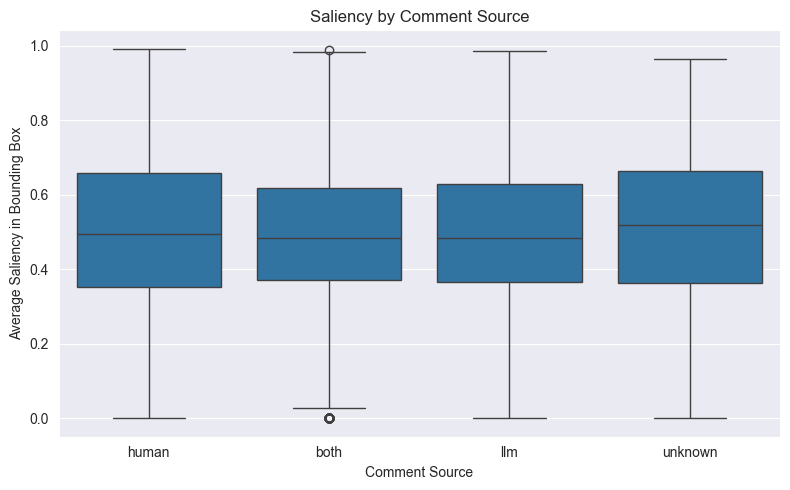

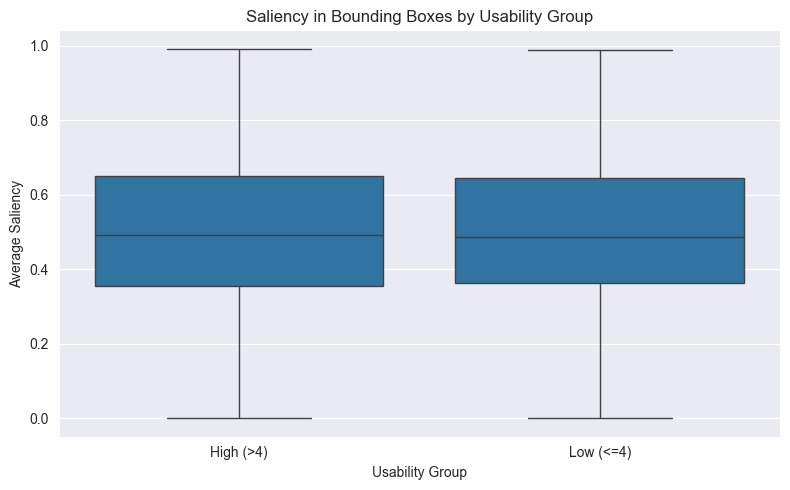

{'Pearson Correlation': -0.007545363229378465, 'P-value': 0.22602794556933828}

In [4]:
# Re-import required libraries after code state reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Re-load data
bbox_df = pd.read_csv("../eval/uicrit/bbox_saliency_analysis.csv")
uicrit_df = pd.read_csv("../data/uicrit/uicrit_public.csv")

# Merge usability rating
usability_df = uicrit_df[['rico_id', 'usability_rating']].drop_duplicates()
merged_df = pd.merge(bbox_df, usability_df, on='rico_id', how='left')

# Mean saliency by comment source
mean_saliency_by_source = merged_df.groupby('comment_source')['avg_saliency'].mean().reset_index()

# Plot saliency by comment source
plt.figure(figsize=(8, 5))
sns.boxplot(x='comment_source', y='avg_saliency', data=bbox_df)
plt.title('Saliency by Comment Source')
plt.ylabel('Average Saliency in Bounding Box')
plt.xlabel('Comment Source')
plt.tight_layout()
plt.show()

# Usability group split
merged_df['usability_group'] = merged_df['usability_rating'].apply(lambda x: 'Low (<=4)' if x <= 4 else 'High (>4)')

# Plot saliency by usability group
plt.figure(figsize=(8, 5))
sns.boxplot(x='usability_group', y='avg_saliency', data=merged_df)
plt.title('Saliency in Bounding Boxes by Usability Group')
plt.ylabel('Average Saliency')
plt.xlabel('Usability Group')
plt.tight_layout()
plt.show()

# Correlation between saliency and usability rating
correlation, p_value = pearsonr(merged_df['avg_saliency'], merged_df['usability_rating'])

correlation_result = {
    'Pearson Correlation': correlation,
    'P-value': p_value
}

correlation_result
